In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
qml.drawer.use_style(style='sketch')

## Simple Version of Superdense Coding

In [3]:
dev = qml.device('default.qubit', wires=2)

In [4]:
@qml.qnode(dev)
def circuit(alice):
    # Make bell state
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    if alice == (0,0):
        pass
    elif alice == (0,1):
        qml.PauliX(wires=0)
    elif alice == (1,0):
        qml.PauliZ(wires=0)
    elif alice == (1,1):
        qml.PauliY(wires=0)
    
    # Alice sends her qubit to Bob
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    return qml.probs(wires=[0,1])

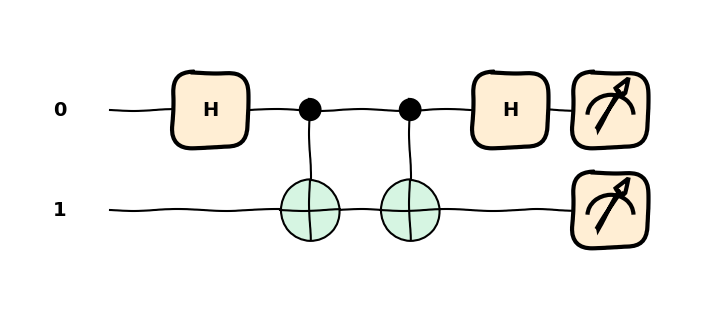

[1. 0. 0. 0.]


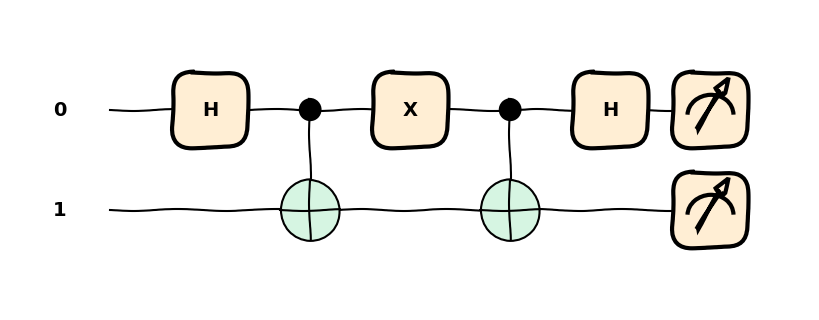

[0. 1. 0. 0.]


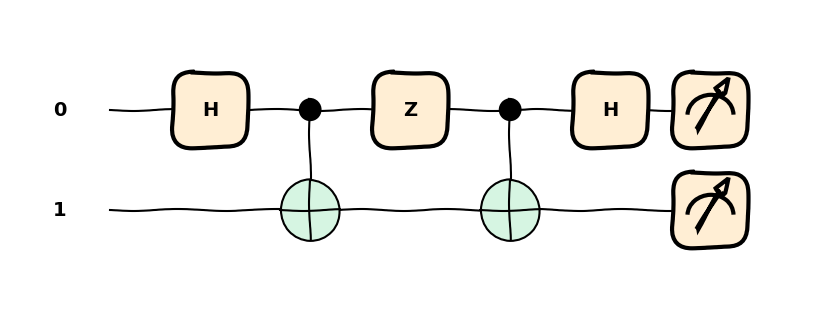

[0. 0. 1. 0.]


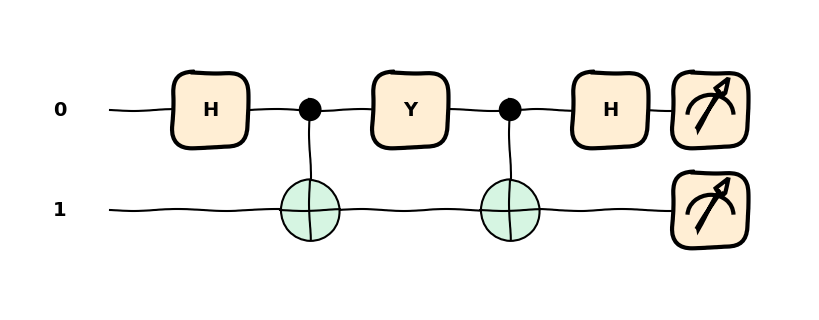

[0. 0. 0. 1.]


In [5]:
alice_candidates = [
    (0,0),
    (0,1),
    (1,0),
    (1,1)
]

for alice in alice_candidates:
    qml.draw_mpl(circuit)(alice)
    plt.show()
    print(circuit(alice))

## Full version of Superdense Coding

In [6]:
dev = qml.device('default.qubit', wires=['e1', 'e2', 'a', 'b'])

In [7]:
@qml.qnode(dev)
def circuit(alice):
    # Make bell state
    qml.Hadamard(wires=['a'])
    qml.CNOT(wires=['a', 'b'])

    # Prepare alice qubit
    qml.BasisStatePreparation(alice, wires=['e1', 'e2'])

    # Encode alice qubit
    qml.CZ(wires=['e1','a'])
    qml.CNOT(wires=['e2','a'])

    # Alice sends her qubit to Bob
    qml.CNOT(wires=['a', 'b'])
    qml.Hadamard(wires='a')
    return qml.probs(wires=['a','b'])

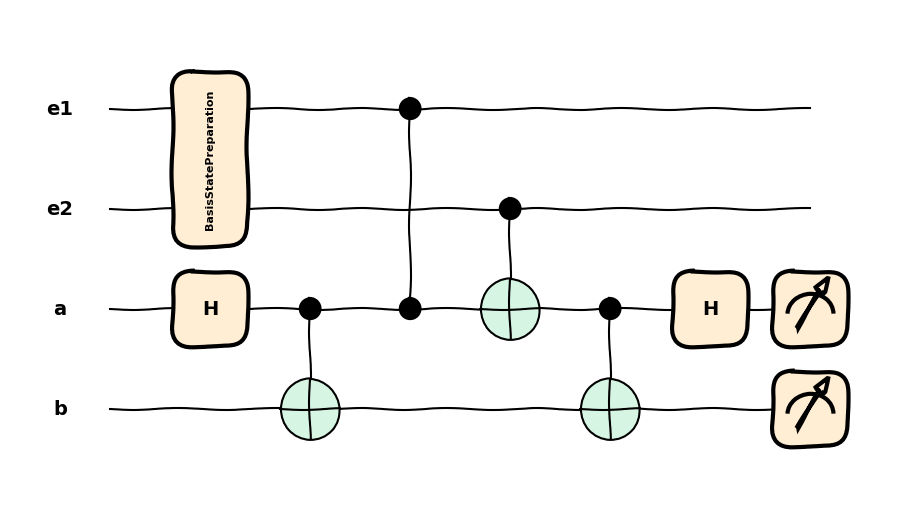

In [8]:
qml.draw_mpl(circuit)(alice_candidates[0])
plt.show()

**Explanation of the circuit**

1) Prepare the Bell state (entangle alice and bob)
$$
\text{CNOT}(H|a\rangle \otimes |b\rangle) = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

2) Prepare basis state for what alice wants to send to bob
$$
|e_1\rangle \otimes |e_2\rangle
$$

3) Encode the basis state to the alice's qubit
$$
\begin{aligned}
&|e_1\rangle \otimes |e_2\rangle \otimes \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \overset{\text{CZ}(e_1, a)}{\longrightarrow} |e_1\rangle \otimes |e_2\rangle \otimes \frac{1}{\sqrt{2}}(|00\rangle + (-1)^{e_1}|11\rangle) \\
\overset{\text{CNOT}(e_2, a)}{\longrightarrow} &|e_1\rangle \otimes |e_2\rangle \otimes \frac{1}{\sqrt{2}}(|e_20\rangle + (-1)^{e_1}|e_2\oplus 1\,1\rangle)
\end{aligned}
$$

4) Decode the message from alice's qubit
$$
\begin{aligned}
&\frac{1}{\sqrt{2}}(|e_20\rangle + (-1)^{e_1}|e_2\oplus 1\,1\rangle) \overset{\text{CNOT}(a, b)}{\longrightarrow} \frac{1}{\sqrt{2}}(|e_2 e_2\rangle + (-1)^{e_1}|e_2\oplus1~ e_2\rangle) \\
\overset{H(a)}{\longrightarrow} & \frac{1}{2}\left[|0 e_2\rangle + (-1)^{e_2}|1 e_2\rangle + (-1)^{e_1} (|0e_2\rangle + (-1)^{1-e_2}|1e_2\rangle)  \right] \\
=& \frac{1}{2}\left[(1 + (-1)^{e_1})|0\rangle + (-1)^{e_2}(1 - (-1)^{e_1})|1\rangle \right] \otimes |e_2\rangle \\
=& (-1)^{e_1 e_2}|e_1\rangle \otimes |e_2\rangle
\end{aligned}
$$

In [9]:
for alice in alice_candidates:
    print(f"Input: {alice}, Output: {circuit(alice)}")

Input: (0, 0), Output: [1. 0. 0. 0.]
Input: (0, 1), Output: [0. 1. 0. 0.]
Input: (1, 0), Output: [0. 0. 1. 0.]
Input: (1, 1), Output: [0. 0. 0. 1.]
